In [32]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

# Define the number of examples.
M = 1001

# Generate target function.
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)
y = x1 + x2 + np.random.randn(M, 1)

# Generate values for parameters.
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )

# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
 
#############################################################
# Number of epochs.
#n_epochs = 1
# Constant learning rate.
#alpha = 0.1

# Random initialization of parameters.
#a = np.random.randn(2,1)
#a[0] = -10;
#a[1] = -10;

# Create vector for parameter history.
#a_hist = np.zeros((2, n_epochs*M+1))
# Initialize history vector.
#a_hist[0, 0] = a[0]
#a_hist[1, 0] = a[1]

# Create array for storing error values.
#Jgd = np.zeros(n_epochs*M+1)
############################################################

# learning rate.
alpha = 0.1
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -10;
a[1] = -10;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1

# Stocastic gradient-descent loop.
grad_hist = np.zeros((2, n_iterations*M))
for iterations in range(n_iterations):
    for i in range(M):
        random_index = np.random.randint(M)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = -2*xi.T.dot(yi - xi.dot(a))
        grad_hist[0, iteration*M+i+1] = gradients[0]
        grad_hist[1, iteration*M+i+1] = gradients[1]
        a = a - alpha * gradients
        a_hist[0, iteration*M+i+1] = a[0]
        a_hist[1, iteration*M+i+1] = a[1]
        Jgd[iteration*M+i] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))

IndexError: index 1001 is out of bounds for axis 1 with size 1001

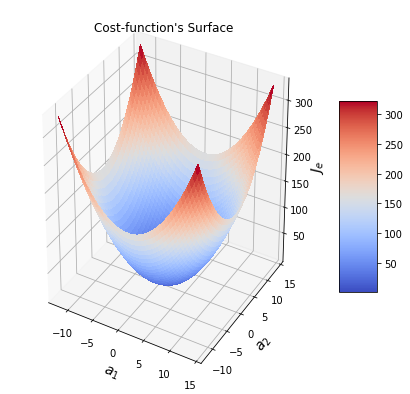

<Figure size 432x288 with 0 Axes>

In [29]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#Show the plot.
plt.show()

plt.savefig("error_surface_sgd.png", dpi=600)

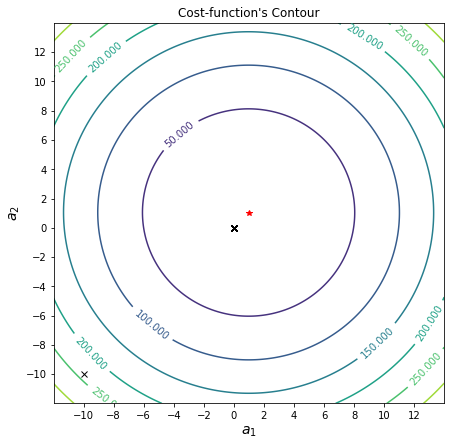

<Figure size 432x288 with 0 Axes>

In [30]:
# Plot figure.        
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')
plt.xticks(np.arange(-10, 14, step=2.0))
plt.yticks(np.arange(-10, 14, step=2.0))
plt.show()

plt.savefig("error_contour_sgd.png", dpi=600)

C:\Users\cristiana\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  after removing the cwd from sys.path.


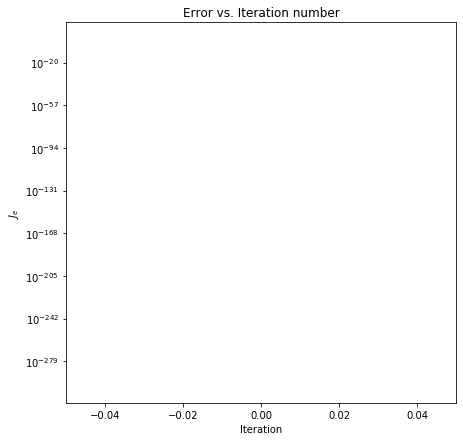

<Figure size 432x288 with 0 Axes>

In [25]:
fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, iterations*M), Jgd[0:iterations*M])
plt.xlim((0, iterations*M))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [26]:
# Print found values.
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))

print('a0_sgd: ' + str(a[0, 0]))
print('a1_sgd: ' + str(a[1, 0]))

a0_opt: 1.0262905870642958
a1_opt: 1.0197341993937803
a0_sgd: -10.0
a1_sgd: -10.0


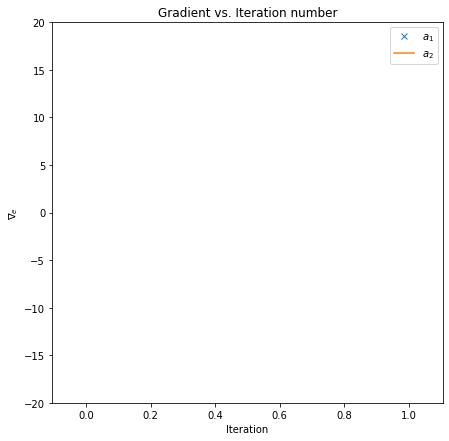

In [27]:
fig = plt.figure(figsize=(7,7))

plt.plot(np.arange(0, iteration*M), grad_hist[0,:], 'x', label='$a_1$')
plt.plot(np.arange(0, iteration*M), grad_hist[1,:], label='$a_2$')
plt.ylim([-20, 20])
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()